In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/preprocessed_data.csv')

In [44]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
cancer_type_counts = df['cancer_type'].value_counts()
df['content'] = df['content'].astype(str)
df['content_length'] = df['content'].apply(lambda x: len(x.split()))
df['log_content_length'] = np.log10(df['content_length'] + 1)

from textblob import TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [45]:
# Replace 'comments' with the appropriate column name if it differs in your dataset
df_comments = df[['username', 'comments']].dropna()  # Assuming 'comments' is the column name for comments data

# Rename columns to match the expected column names in the community network code
df_comments.rename(columns={'username': 'Author', 'comments': 'Comment'}, inplace=True)

In [46]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Filter Data for a Specific Cancer Type
cancer_type = 'Breast Cancer'  # We can change this to the cancer type you are interested in
filtered_data = df[df['cancer_type'] == cancer_type]

# Step 2: Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Preprocess the 'content' column
filtered_data['processed_content'] = filtered_data['content'].apply(preprocess_text)

# Step 3: Frequency Analysis
# Flatten the list of processed tokens
all_tokens = [token for sublist in filtered_data['processed_content'] for token in sublist]

# Count the frequency of each token
word_freq = Counter(all_tokens)

# Get the most common symptoms (e.g., top 10)
top_symptoms = word_freq.most_common(10)
print("Top 10 Common Symptoms for", cancer_type, ":\n", top_symptoms)

# Step 4: Visualization
# Create a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_symptoms))

# Plot the word cloud
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.title('Top 10 Common Symptoms for ' + cancer_type)
# plt.axis('off')
# plt.show()

Top 10 Common Symptoms for Breast Cancer :
 [('wa', 167), ('cancer', 128), ('breast', 122), ('ha', 100), ('radiation', 94), ('im', 85), ('anyone', 80), ('would', 75), ('chemo', 66), ('week', 65)]


C:\Users\athar\AppData\Local\Temp\ipykernel_21724\2811419897.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['processed_content'] = filtered_data['content'].apply(preprocess_text)


In [47]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
import re
from collections import Counter

# Step 1: Define Relevant Keywords for Side Effects
side_effect_keywords = ["nausea", "fatigue", "hair loss", "vomiting", "pain", "weight loss"]  # Add more as needed

# Step 2: Text Processing
# Function to preprocess text (tokenization and lowercase)
def preprocess_text(text):
    # Tokenize text and convert to lowercase
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

# Preprocess the 'comments' and 'content' columns
df['processed_comments'] = df['comments'].apply(preprocess_text)
df['processed_content'] = df['content'].apply(preprocess_text)

# Step 3: Keyword Matching
# Function to count occurrences of side effect keywords
def count_side_effects(text_tokens):
    return Counter([token for token in text_tokens if token in side_effect_keywords])

# Count side effect occurrences in comments and content
df['side_effects_comments'] = df['processed_comments'].apply(count_side_effects)
df['side_effects_content'] = df['processed_content'].apply(count_side_effects)

# Step 4: Count Occurrences of Each Side Effect
# Combine counts from comments and content
combined_side_effects = df['side_effects_comments'] + df['side_effects_content']

# Calculate total occurrences of each side effect
total_side_effect_counts = combined_side_effects.sum()

# Print the result
for side_effect, count in total_side_effect_counts.items():
    print(f"{side_effect}: {count} mentions")

pain: 4371 mentions
fatigue: 476 mentions
nausea: 505 mentions
vomiting: 131 mentions


In [49]:
import re
from collections import Counter

# Step 1: Define Relevant Keywords for Side Effects
side_effect_keywords = [
    "nausea", "vomiting", "diarrhea", "constipation", "abdominal pain", "stomach pain",
    "loss of appetite", "weight loss", "fatigue", "weakness", "dizziness", "headache",
    "numbness", "tingling", "muscle pain", "joint pain", "back pain", "chest pain",
    "shortness of breath", "coughing", "high blood pressure", "low blood pressure",
    "irregular heartbeat", "palpitations", "fever", "chills", "night sweats", "infection",
    "sore throat", "difficulty swallowing", "mouth sores", "hair loss", "skin rash",
    "itching", "bruising", "bleeding", "anemia", "memory problems", "confusion",
    "anxiety", "depression", "hallucinations", "seizures", "tremors", "vision changes",
    "hearing changes", "difficulty walking", "loss of balance"
]


# Step 2: Text Processing
# Function to preprocess text (tokenization and lowercase)
def preprocess_text(text):
    # Tokenize text and convert to lowercase
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

# Preprocess the 'comments' and 'content' columns
df['processed_comments'] = df['comments'].apply(preprocess_text)
df['processed_content'] = df['content'].apply(preprocess_text)

# Step 3: Keyword Matching
# Function to count occurrences of side effect keywords
def count_side_effects(text_tokens):
    return Counter([token for token in text_tokens if token in side_effect_keywords])

# Define a function to apply to each group
def get_side_effect_counts(group):
    # Count side effect occurrences in comments and content for the current group
    group['side_effects_comments'] = group['processed_comments'].apply(count_side_effects)
    group['side_effects_content'] = group['processed_content'].apply(count_side_effects)

    # Combine counts from comments and content
    combined_side_effects = group['side_effects_comments'] + group['side_effects_content']

    # Calculate total occurrences of each side effect for the current group
    total_side_effect_counts = combined_side_effects.sum()

    return total_side_effect_counts

# Apply the function to each group (cancer type)
side_effect_counts_by_cancer_type = df.groupby('cancer_type').apply(get_side_effect_counts)

# Print the results
for cancer_type, side_effect_counts in side_effect_counts_by_cancer_type.items():
    print(f"Side effects for {cancer_type}:")
    for side_effect, count in side_effect_counts.items():
        print(f"{side_effect}: {count} mentions")
    print()


Side effects for Anal Cancer:
anxiety: 35 mentions
infection: 29 mentions
fatigue: 25 mentions
anemia: 3 mentions
nausea: 30 mentions
bleeding: 85 mentions
diarrhea: 89 mentions
itching: 50 mentions
depression: 7 mentions
constipation: 26 mentions
fever: 8 mentions
headache: 7 mentions
weakness: 1 mentions
numbness: 10 mentions
tingling: 6 mentions
vomiting: 2 mentions

Side effects for Bladder Cancer:
weakness: 1 mentions
fever: 8 mentions
infection: 75 mentions
nausea: 13 mentions
fatigue: 15 mentions
anxiety: 9 mentions
itching: 1 mentions
depression: 5 mentions
bleeding: 14 mentions
headache: 1 mentions
vomiting: 1 mentions
constipation: 2 mentions
anemia: 1 mentions
dizziness: 1 mentions
diarrhea: 1 mentions

Side effects for Bone Cancers:
headache: 1 mentions
infection: 12 mentions
dizziness: 2 mentions
tingling: 2 mentions
nausea: 10 mentions
depression: 2 mentions
anxiety: 2 mentions
coughing: 2 mentions
fatigue: 7 mentions
weakness: 2 mentions
diarrhea: 1 mentions
fever: 3 men

C:\Users\athar\AppData\Local\Temp\ipykernel_21724\2255695524.py:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  side_effect_counts_by_cancer_type = df.groupby('cancer_type').apply(get_side_effect_counts)


In [50]:
cancer_type_counts = df['cancer_type'].value_counts()
print(cancer_type_counts)

cancer_type
Uterine/Endometrial Cancer                                148
Breast Cancer                                             147
Rare and Other Cancers                                    147
Head and Neck Cancer                                      147
Lymphoma (Hodgkin and Non-Hodgkin)                        146
Thyroid Cancer                                            146
Testicular Cancer                                         146
Stomach Cancer                                            146
Skin Cancer                                               146
Sarcoma                                                   146
Prostate Cancer                                           146
Peritoneal Cancer                                         146
Ovarian Cancer                                            146
Multiple Myeloma                                          146
Anal Cancer                                               146
Bladder Cancer                                            

In [51]:
import pandas as pd
from itertools import permutations, combinations

# Extract unique cancer types
cancer_types = df['cancer_type'].unique()

# Find the maximum number of elements for combinations (all elements)
max_set_size = len(cancer_types)

print(max_set_size)

set_size = 2

# Get combinations
print(f"\nCombinations for set size {set_size}:")
for combo in combinations(cancer_types, set_size):
    print(combo)


27

Combinations for set size 2:
('Anal Cancer', 'Bladder Cancer')
('Anal Cancer', 'Bone Cancers')
('Anal Cancer', 'Brain Cancer')
('Anal Cancer', 'Breast Cancer')
('Anal Cancer', 'Childhood Cancers')
('Anal Cancer', 'Colorectal Cancer')
('Anal Cancer', 'Esophageal Cancer')
('Anal Cancer', 'Gynecological Cancers (other than ovarian and uterine)')
('Anal Cancer', 'Head and Neck Cancer')
('Anal Cancer', 'Kidney Cancer')
('Anal Cancer', 'Leukemia')
('Anal Cancer', 'Liver Cancer')
('Anal Cancer', 'Lung Cancer')
('Anal Cancer', 'Lymphoma (Hodgkin and Non-Hodgkin)')
('Anal Cancer', 'Multiple Myeloma')
('Anal Cancer', 'Ovarian Cancer')
('Anal Cancer', 'Pancreatic Cancer')
('Anal Cancer', 'Peritoneal Cancer')
('Anal Cancer', 'Prostate Cancer')
('Anal Cancer', 'Rare and Other Cancers')
('Anal Cancer', 'Sarcoma')
('Anal Cancer', 'Skin Cancer')
('Anal Cancer', 'Stomach Cancer')
('Anal Cancer', 'Testicular Cancer')
('Anal Cancer', 'Thyroid Cancer')
('Anal Cancer', 'Uterine/Endometrial Cancer')
('B

In [52]:
import pandas as pd
from itertools import permutations, combinations

# Extract unique cancer types
cancer_types = df['cancer_type'].unique()

# Find the maximum number of elements for combinations (all elements)
max_set_size = len(cancer_types)

# Prompt the user to input the size of the combination set
set_size = 2

# Ensure the input is within a valid range
if set_size < 1 or set_size > max_set_size:
    print("Invalid set size. Please enter a value between 1 and", max_set_size)
else:

    # Get combinations
    combinations_list = list(combinations(cancer_types, set_size))  # Store combinations in a list
    combination_count = len(combinations_list)  # Count the generated combinations

    print(f"\nCombinations for set size {set_size} (Total Number of Combinations: {combination_count}):")
    for combo in combinations_list:
        print(combo)


Combinations for set size 2 (Total Number of Combinations: 351):
('Anal Cancer', 'Bladder Cancer')
('Anal Cancer', 'Bone Cancers')
('Anal Cancer', 'Brain Cancer')
('Anal Cancer', 'Breast Cancer')
('Anal Cancer', 'Childhood Cancers')
('Anal Cancer', 'Colorectal Cancer')
('Anal Cancer', 'Esophageal Cancer')
('Anal Cancer', 'Gynecological Cancers (other than ovarian and uterine)')
('Anal Cancer', 'Head and Neck Cancer')
('Anal Cancer', 'Kidney Cancer')
('Anal Cancer', 'Leukemia')
('Anal Cancer', 'Liver Cancer')
('Anal Cancer', 'Lung Cancer')
('Anal Cancer', 'Lymphoma (Hodgkin and Non-Hodgkin)')
('Anal Cancer', 'Multiple Myeloma')
('Anal Cancer', 'Ovarian Cancer')
('Anal Cancer', 'Pancreatic Cancer')
('Anal Cancer', 'Peritoneal Cancer')
('Anal Cancer', 'Prostate Cancer')
('Anal Cancer', 'Rare and Other Cancers')
('Anal Cancer', 'Sarcoma')
('Anal Cancer', 'Skin Cancer')
('Anal Cancer', 'Stomach Cancer')
('Anal Cancer', 'Testicular Cancer')
('Anal Cancer', 'Thyroid Cancer')
('Anal Cancer', 

In [53]:
import pandas as pd
from itertools import permutations, combinations

# Assuming cancer types are in the 'cancer_type' column of your DataFrame 'df'
# Assuming 'side_effect_counts_by_cancer_type' holds side effect counts for each type (from previous code)

# Extract unique cancer types
cancer_types = df['cancer_type'].unique()

# Function to find commonly mentioned side effects within a set of cancer types
def find_common_symptoms(type_set):
    # Extract side effect counts for types in the set
    type_side_effects = {cancer_type: side_effect_counts_by_cancer_type.loc[cancer_type] for cancer_type in type_set}

    # Convert Counters to DataFrames and sum values
    type_side_effects_df = pd.DataFrame(type_side_effects.values())
    min_count = type_side_effects_df.sum(axis=0)

    common_symptoms = [side_effect for side_effect, count in min_count.items() if count > 0]
    return common_symptoms

# Get user input for set size
max_set_size = len(cancer_types)
set_size = 2

if set_size < 1 or set_size > max_set_size:
    print("Invalid set size. Please enter a value between 1 and", max_set_size)
else:
    # Generate combinations and count them
    combinations_list = list(combinations(cancer_types, set_size))
    combination_count = len(combinations_list)

    print(f"\nCombinations for set size {set_size} (Total Number of Combinations: {combination_count}):")

    # Find common symptoms for each combination
    for combo in combinations_list:
        common_symptoms = find_common_symptoms(combo)
        print(f"Common symptoms for {combo}: {common_symptoms}")


Combinations for set size 2 (Total Number of Combinations: 351):
Common symptoms for ('Anal Cancer', 'Bladder Cancer'): ['anxiety', 'infection', 'fatigue', 'anemia', 'nausea', 'bleeding', 'diarrhea', 'itching', 'depression', 'constipation', 'fever', 'headache', 'weakness', 'numbness', 'tingling', 'vomiting', 'dizziness']
Common symptoms for ('Anal Cancer', 'Bone Cancers'): ['anxiety', 'infection', 'fatigue', 'anemia', 'nausea', 'bleeding', 'diarrhea', 'itching', 'depression', 'constipation', 'fever', 'headache', 'weakness', 'numbness', 'tingling', 'vomiting', 'dizziness', 'coughing', 'bruising']
Common symptoms for ('Anal Cancer', 'Brain Cancer'): ['anxiety', 'infection', 'fatigue', 'anemia', 'nausea', 'bleeding', 'diarrhea', 'itching', 'depression', 'constipation', 'fever', 'headache', 'weakness', 'numbness', 'tingling', 'vomiting', 'confusion', 'coughing', 'dizziness']
Common symptoms for ('Anal Cancer', 'Breast Cancer'): ['anxiety', 'infection', 'fatigue', 'anemia', 'nausea', 'blee

In [54]:
import pandas as pd
from itertools import combinations

# Assuming cancer types are in the 'cancer_type' column of your DataFrame 'df'
# Assuming 'side_effect_counts_by_cancer_type' holds side effect counts for each type (from previous code)

# Extract unique cancer types
cancer_types = df['cancer_type'].unique()

# Function to find commonly mentioned side effects within a set of cancer types
def find_common_symptoms(type_set):
    # Extract side effect counts for types in the set
    type_side_effects = {cancer_type: side_effect_counts_by_cancer_type.loc[cancer_type] for cancer_type in type_set}

    # Convert Counters to DataFrames and sum values
    type_side_effects_df = pd.DataFrame(type_side_effects.values())
    min_count = type_side_effects_df.sum(axis=0)

    common_symptoms = [side_effect for side_effect, count in min_count.items() if count > 0]
    return common_symptoms

# Hardcoded values for selected cancer types
selected_cancer_indices = [0, 2, 4]  # Example indices for cancer types
selected_cancer_types = tuple([cancer_types[i] for i in selected_cancer_indices])

# Find common symptoms based on hardcoded cancer types
common_symptoms = find_common_symptoms(selected_cancer_types)
print(f"\nCommon symptoms for {selected_cancer_types}: {common_symptoms}")


Common symptoms for ('Anal Cancer', 'Bone Cancers', 'Breast Cancer'): ['anxiety', 'infection', 'fatigue', 'anemia', 'nausea', 'bleeding', 'diarrhea', 'itching', 'depression', 'constipation', 'fever', 'headache', 'weakness', 'numbness', 'tingling', 'vomiting', 'dizziness', 'coughing', 'bruising']


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords  # Import stopwords


def analyze_top_discussion_topics_per_type(df, n=10):
    # Group discussions by cancer type
    cancer_type_groups = df.groupby("cancer_type")

    # Analyze topics for each cancer type
    for cancer_type, group_df in cancer_type_groups:
        print(f"\nTop {n} Most Frequent Topics for {cancer_type} Discussions:")

        # Create a new column for combined text (replace with your actual column names)
        group_df["text"] = group_df["cancer_type"] + " " + group_df["title"] + " " + group_df["content"] + " " + group_df["comments"].str.join(" ")

        # Text preprocessing
        stop_words = set(stopwords.words('english'))  # Create stop word set
        group_df["text"] = group_df["text"].str.lower()  # Lowercase conversion
        group_df["text"] = group_df["text"].str.replace("[^a-zA-Z0-9\s]", "")  # Remove punctuation
        group_df["text"] = group_df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]) if isinstance(x, str) else x)  # Handles non-strings gracefully

        # Tokenization
        tokens = group_df["text"].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

        # Generate bigrams (2-word phrases)
        all_bigrams = pd.Series(tokens.sum()).reset_index(name='word')  # Create DataFrame from word counts
        #all_bigrams = all_bigrams.rename(columns={'word': 'count'})  # Optional: rename column

        #print(all_bigrams.columns)
        # Count occurrences (prioritize bigrams if trigrams are unavailable)
        topic_counts = all_bigrams.groupby('word')['word'].sum().sort_values(ascending=False)  # Replace with actual column name
        top_n_grams = topic_counts.head(n)

        # Print top n most frequent topics
        for topic, count in top_n_grams.items():
            print(f"- {topic}: {count} mentions")


# Load your cancer discussion dataset into a DataFrame named 'df' (replace with your actual loading steps)
df = pd.read_csv("Data/preprocessed_data.csv")

# Analyze top discussion topics for each cancer type
analyze_top_discussion_topics_per_type(df.copy())


Top 10 Most Frequent Topics for Anal Cancer Discussions:


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\athar\AppData\Local\Temp\ipykernel_21724\3213764532.py:23: SyntaxWarning: invalid escape sequence '\s'
  group_df["text"] = group_df["text"].str.replace("[^a-zA-Z0-9\s]", "")  # Remove punctuation


- z: zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz mentions
- zone: zone mentions
- zinc: zinczinc mentions
- zetapupi: zetapupi mentions
- zetapup: zetapup mentions
- zealand: zealand mentions
- yup: yup mentions
- yr: yryryryryryryryryryryryr mentions
- yrsmy: yrsmy mentions
- yrs: yrs mentions

Top 10 Most Frequent Topics for Bladder Cancer Discussions:
- ’: ’ mentions
- z: zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz mentions
- yucky: yucky mentions
- yr: yryryryr mentions
- yrs: yrs mentions
- young: youngyoungyoungyoungyoungyoung mentions
- younger: youngeryoungeryounger mentions
- youim: youi

In [56]:

# Parse date strings into datetime objects (adjust if date format is different)
df['date'] = pd.to_datetime(df['date'])

# Get minimum and maximum dates
min_date = df['date'].min()
max_date = df['date'].max()

# Calculate the number of years
num_years = (max_date.year - min_date.year)

# Calculate the difference in days (consider hours too)
time_delta = max_date - min_date

# Print results
print("Range of Dates:")
print(f"- Oldest Date: {min_date.strftime('%Y-%m-%d')}")
print(f"- Latest Date: {max_date.strftime('%Y-%m-%d')}")
print(f"- Number of Years: {num_years}")
print(f"- Number of Days: {time_delta.days}")


Range of Dates:
- Oldest Date: 2000-07-21
- Latest Date: 2024-02-24
- Number of Years: 24
- Number of Days: 8617


In [57]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# 2. Identifying Specific Emotions
def identify_emotions(text):
    if isinstance(text, str):  # Check if text is a string
        sentiment_score = sid.polarity_scores(text)
        emotion = max(sentiment_score, key=sentiment_score.get)
        return emotion
    else:
        return None  # Return None for NaN values

# Apply the function to the 'content' column
df['emotion'] = df['content'].apply(identify_emotions)


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 3. Topic-Specific Sentiment
def get_topics_sentiment(texts):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(texts.fillna(''))  # Fill NaN values with empty string

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)

    feature_names = vectorizer.get_feature_names_out()

    topic_sentiments = []
    for text in texts:
        X_text = vectorizer.transform([text])
        topic_mixture = lda.transform(X_text)[0]
        top_topics_idx = topic_mixture.argsort()[-5:]  # Get top 5 topics
        topic_features = [feature_names[idx] for idx in top_topics_idx]
        topic_sentiments.append(topic_features)

    return topic_sentiments

df['topics_sentiment'] = get_topics_sentiment(df['content'].fillna(''))  # Fill NaN values with empty string

In [60]:
# 4. Comparative Sentiment Analysis
def compare_sentiment_across_groups(data, group_column, text_column):
    sentiments_by_group = {}
    groups = data[group_column].unique()

    for group in groups:
        group_data = data[data[group_column] == group]
        sentiments = [sid.polarity_scores(text)['compound'] for text in group_data[text_column].fillna('')]  # Fill NaN values with empty string
        sentiments_by_group[group] = sentiments

    return sentiments_by_group

sentiments_by_cancer_type = compare_sentiment_across_groups(df, 'cancer_type', 'content')

In [61]:
# Displaying the results
print("Emotions Identified:")
print(df['emotion'].value_counts())

print("\nTopic-Specific Sentiment:")
for idx, features in enumerate(df['topics_sentiment']):
    print(f"Topic {idx + 1}: {', '.join(features)}")

print("\nComparative Sentiment Analysis by Cancer Type:")
for cancer_type, sentiments in sentiments_by_cancer_type.items():
    print(f"{cancer_type}: Mean Sentiment {np.mean(sentiments):.2f}")


Emotions Identified:
emotion
neu         2645
compound    1124
neg           40
pos            4
Name: count, dtype: int64

Topic-Specific Sentiment:
Topic 1: abandon, abandoned, abd, aa, abandoning
Topic 2: abandon, abandoned, abandoning, aa, abd
Topic 3: abandoning, abandoned, aa, abandon, abd
Topic 4: abandoning, abandon, abd, abandoned, aa
Topic 5: abandon, abd, aa, abandoning, abandoned
Topic 6: abandon, abandoned, aa, abandoning, abd
Topic 7: abd, aa, abandon, abandoned, abandoning
Topic 8: abd, abandon, abandoning, abandoned, aa
Topic 9: abandon, abd, aa, abandoned, abandoning
Topic 10: abd, abandoning, abandoned, abandon, aa
Topic 11: aa, abandoning, abandon, abandoned, abd
Topic 12: abandoned, aa, abandon, abandoning, abd
Topic 13: abandoning, abandoned, abandon, abd, aa
Topic 14: abd, abandoning, abandon, abandoned, aa
Topic 15: abandon, abd, abandoned, abandoning, aa
Topic 16: abandon, abandoning, abandoned, abd, aa
Topic 17: abandon, abandoning, abandoned, abd, aa
Topic 18:

In [62]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [63]:
import spacy
from collections import Counter
import pandas as pd

# Load the English NER model from spaCy
nlp = spacy.load("en_core_web_sm")

# Function to identify opinion targets using NER
def identify_opinion_targets(text):
    doc = nlp(text)
    opinion_targets = []
    for ent in doc.ents:
        if ent.label_ in ['ORG', 'PRODUCT']:  # Consider only organizations and products as opinion targets
            opinion_targets.append(ent.text)
    return opinion_targets

# Function to perform frequency analysis of nouns
def frequency_analysis_of_nouns(texts):
    nouns = []
    for text in texts:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == 'NOUN':
                nouns.append(token.text)
    return Counter(nouns)

# Example dataframe (replace this with your actual dataframe)
data = {
    'content': ['Some text', 'Some other text', float('nan'), 'More text']
}
df = pd.DataFrame(data)

# Replace NaN values with empty strings
df['content'] = df['content'].fillna('')

df['opinion_targets_ner'] = df['content'].apply(identify_opinion_targets)
noun_frequencies = frequency_analysis_of_nouns(df['content'])

# Display the opinion targets identified using NER
print("\nOpinion Targets Identified using Named Entity Recognition (NER):")
for idx, targets in enumerate(df['opinion_targets_ner']):
    if targets:
        print(f"Opinion Targets for entry {idx + 1}: {', '.join(targets)}")

# Display the most frequent nouns
print("\nMost Frequent Nouns:")
print(noun_frequencies.most_common(10))



Opinion Targets Identified using Named Entity Recognition (NER):

Most Frequent Nouns:
[('text', 3)]


In [64]:
def get_sentiment_and_emotions(text):
  """
  This function analyzes sentiment and identifies emotions in a text string.

  Args:
      text: The text string to be analyzed.

  Returns:
      A dictionary containing sentiment polarity (positive, neutral, negative),
      subjectivity score (0-1), and a list of detected emotions.
  """
  blob = TextBlob(text)
  sentiment = {
      "polarity": blob.sentiment.polarity,  # Positive: > 0, Neutral: 0, Negative: < 0
      "subjectivity": blob.sentiment.subjectivity  # 0: objective, 1: subjective
  }
  emotions = []
  # Customize emotion detection based on your needs (consider VADER for more options)
  if blob.sentiment.polarity > 0.5:
    emotions.append("joy")  # Add more positive emotions as needed
  elif blob.sentiment.polarity < -0.5:
    emotions.append("anger")  # Add more negative emotions as needed
  # Add logic to identify other emotions based on sentiment scores and word patterns

  return {"sentiment": sentiment, "emotions": emotions}


In [65]:
# Create a new column to store sentiment analysis results
df['sentiment_analysis'] = df['content'].apply(get_sentiment_and_emotions)


In [66]:
# Get all emotions detected across reviews (handle potential empty lists)
all_emotions = []
for sentiment in df['sentiment_analysis']:
  if sentiment:  # Check if sentiment is not empty
    all_emotions.extend(sentiment['emotions'])

# Count emotion occurrences (handle potential empty list)
if all_emotions:  # Check if all_emotions has elements before creating Series
  emotion_counts = pd.Series(all_emotions).value_counts()
  print("Emotion Distribution:")
  print(emotion_counts)

  # Visualize emotion distribution (optional)
  emotion_counts.plot(kind='bar')
  plt.title("Distribution of Emotions in Reviews")
  plt.show()
else:
  print("No emotions detected in the data.")

No emotions detected in the data.


In [67]:
# Define topics/features of interest (replace with your actual topics)
topics = ["treatment", "side effects", "survival rate"]

# Analyze sentiment for each topic
for topic in topics:
  topic_reviews = df[df['content'].str.contains(topic, case=False)]  # Case-insensitive search
  topic_sentiment = topic_reviews['sentiment_analysis'].apply(lambda x: x['sentiment']['polarity']).mean()
  print(f"Average sentiment for topic '{topic}': {topic_sentiment:.2f}")


Average sentiment for topic 'treatment': nan
Average sentiment for topic 'side effects': nan
Average sentiment for topic 'survival rate': nan


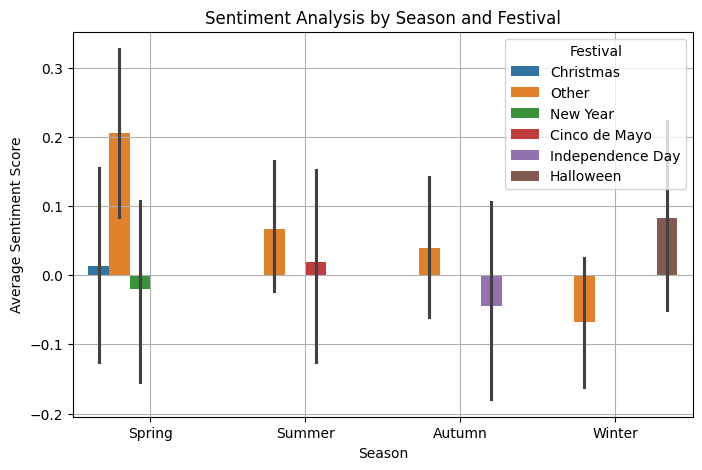

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('Data/preprocessed_data.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Drop rows with NaN values in 'content' column
df = df.dropna(subset=['content'])

# Initialize VADER for sentiment analysis
sid = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis and return compound score
def get_sentiment_score(text):
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']

# Apply sentiment analysis to each post
df['sentiment_score'] = df['content'].apply(get_sentiment_score)

# Extract year, month, season, and festival from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['season'] = df['date'].dt.month % 12 // 3 + 1  # Calculate season based on month

# Function to identify festival based on month
def identify_festival(month):
    if month == 1:
        return 'New Year'
    elif month == 5:
        return 'Cinco de Mayo'
    elif month == 7:
        return 'Independence Day'
    elif month == 10:
        return 'Halloween'
    elif month == 12:
        return 'Christmas'
    else:
        return 'Other'

df['festival'] = df['month'].apply(identify_festival)

# Group by year, month, and festival, calculate average sentiment
sentiment_by_time_and_festival = df.groupby(['year', 'month', 'season', 'festival']).agg({'sentiment_score': 'mean'}).reset_index()

# Plot trend analysis by season and festival
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_by_time_and_festival, x='season', y='sentiment_score', hue='festival')
plt.title('Sentiment Analysis by Season and Festival')
plt.xlabel('Season')
plt.ylabel('Average Sentiment Score')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.legend(title='Festival')
plt.grid(True)
plt.show()
